<a href="https://colab.research.google.com/github/Ayazdani1997/AI-Spring-99-CA5/blob/master/Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torchvision
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import ImageFolder
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import numpy as np
import random


import torch.nn as nn
import torch.nn.functional as F


import time
from datetime import timedelta
from datetime import datetime

Step 1: Define transform classes, instantiating transform objects and instantiating the dataset.

In [2]:


class CustomToTensor(object):
    """Convert PIL Images in sample to pytorch Tensors."""
    
    ## the input image must be grayscaled first
    def __call__(self, image):
        image = np.array(image, dtype=np.float32)
        # numpy image: H x W
        return torch.from_numpy(image)

In [3]:
transform = transforms.Compose([transforms.Grayscale(),
                                CustomToTensor()
                               ]
                              ) ## composes multiple transforms into single one

dataset = ImageFolder("./categorized_products" ,transform=transform)

Step 2: Split Dataset and Make it Iterable

In [5]:
batch_size = 128
validation_split = 0.2

indices = list(range(len(dataset))) # indices of the dataset
print(len(indices))

# TODO: split the dataset into train and test sets randomly with split of 0.2 and assign their indices in the original set to train_indices and test_indices 
inds = set(random.sample(list(range(len(indices))), int(validation_split*len(indices))))
train_indices = [n for i,n in enumerate(indices) if i not in inds]
test_indices = [n for i,n in enumerate(indices) if i in inds]
print(len(train_indices), len(test_indices))

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler, num_workers=128)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=test_sampler, num_workers=128)

37249
29800 7449


In [6]:
classes = dataset.classes
print(classes)

['Accessory Gift Set', 'Backpacks', 'Belts', 'Capris', 'Caps', 'Casual Shoes', 'Clutches', 'Cufflinks', 'Deodorant', 'Dresses', 'Dupatta', 'Earrings', 'Flats', 'Flip Flops', 'Formal Shoes', 'Handbags', 'Heels', 'Innerwear Vests', 'Jackets', 'Jeans', 'Kajal and Eyeliner', 'Kurtas', 'Kurtis', 'Leggings', 'Lip Gloss', 'Lipstick', 'Nail Polish', 'Necklace and Chains', 'Night suits', 'Nightdress', 'Pendant', 'Perfume and Body Mist', 'Ring', 'Sandals', 'Sarees', 'Scarves', 'Shirts', 'Shorts', 'Skirts', 'Socks', 'Sports Shoes', 'Sunglasses', 'Sweaters', 'Sweatshirts', 'Ties', 'Tops', 'Track Pants', 'Trousers', 'Tshirts', 'Tunics', 'Wallets', 'Watches']


In [7]:
def get_number_distribution(loader, classes):
  total_category_count = {classes[i] : 0 for i in range(len(classes))}
  for _, labels in loader:
    for label in labels:
      total_category_count[ classes[label] ] += 1
  for category in classes:
    print('%s : %d' % (category, total_category_count[category]))

print("For Train: ")
get_number_distribution(train_loader, classes)

For Train: 
Accessory Gift Set : 89
Backpacks : 551
Belts : 654
Capris : 138
Caps : 223
Casual Shoes : 2274
Clutches : 234
Cufflinks : 87
Deodorant : 288
Dresses : 361
Dupatta : 96
Earrings : 340
Flats : 412
Flip Flops : 746
Formal Shoes : 507
Handbags : 1412
Heels : 1061
Innerwear Vests : 201
Jackets : 201
Jeans : 494
Kajal and Eyeliner : 86
Kurtas : 1475
Kurtis : 173
Leggings : 142
Lip Gloss : 122
Lipstick : 238
Nail Polish : 261
Necklace and Chains : 131
Night suits : 107
Nightdress : 153
Pendant : 146
Perfume and Body Mist : 487
Ring : 91
Sandals : 716
Sarees : 340
Scarves : 95
Shirts : 2574
Shorts : 436
Skirts : 103
Socks : 537
Sports Shoes : 1627
Sunglasses : 855
Sweaters : 225
Sweatshirts : 223
Ties : 200
Tops : 1427
Track Pants : 233
Trousers : 421
Tshirts : 2839
Tunics : 171
Wallets : 747
Watches : 2050


In [12]:
print("For Test: ")
get_number_distribution(test_loader, classes)

For Test: 
Accessory Gift Set : 22
Backpacks : 170
Belts : 155
Capris : 31
Caps : 57
Casual Shoes : 573
Clutches : 60
Cufflinks : 25
Deodorant : 63
Dresses : 92
Dupatta : 20
Earrings : 69
Flats : 107
Flip Flops : 192
Formal Shoes : 129
Handbags : 349
Heels : 271
Innerwear Vests : 53
Jackets : 47
Jeans : 125
Kajal and Eyeliner : 24
Kurtas : 397
Kurtis : 44
Leggings : 34
Lip Gloss : 27
Lipstick : 64
Nail Polish : 49
Necklace and Chains : 27
Night suits : 32
Nightdress : 36
Pendant : 40
Perfume and Body Mist : 125
Ring : 26
Sandals : 181
Sarees : 94
Scarves : 20
Shirts : 625
Shorts : 114
Skirts : 32
Socks : 148
Sports Shoes : 395
Sunglasses : 216
Sweaters : 61
Sweatshirts : 29
Ties : 47
Tops : 345
Track Pants : 64
Trousers : 102
Tshirts : 669
Tunics : 46
Wallets : 199
Watches : 527


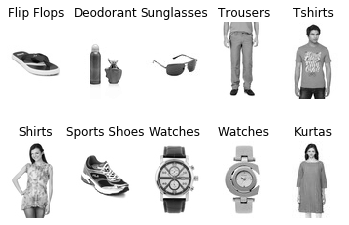

In [28]:
def imshow(img_array, labels, classes):
    _, axs = plt.subplots(2, 5) 
    for i in range(2):
      for j in range(5):
        axs[i][j].imshow(img_array[i * 5 + j], cmap='gray')
        axs[i][j].set_title(classes[labels[i * 5 + j]])
        axs[i][j].axis('off')
    plt.show()

data_iter = iter(train_loader)
data_iter.next()
images, labels = data_iter.next()

imshow(images[0:10], labels[0:10], classes)

In [34]:
print(len(images))
print(len(classes))

64
52


In [8]:
class Model(nn.Module):
    def __init__(self, class_num, act=F.relu):
        super(Model, self).__init__()


        self.layer1 = nn.Linear(4800, 3000)
        self.act1 = act


        self.layer2 = nn.Linear(3000, 2000)
        self.act2 = act



        self.layer3 = nn.Linear(2000, 1000)
        self.act3 = act


        self.layer4 = nn.Linear(1000, 82)
        self.act4 = act

        self.layer5 = nn.Linear(82, class_num)

    def forward(self, x):

        x = x.view(x.size(0), -1)

        x = self.layer1(x)
        x = self.act1(x)

        x = self.layer2(x)
        x = self.act2(x)

        x = self.layer3(x)
        x = self.act3(x)

        x = self.layer4(x)
        x = self.act4(x)

        x = self.layer5(x)
        return x

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [10]:
model = Model(len(classes))

model = model.to(device)

In [11]:
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [12]:
def fit(model, train_loader, device, criterion, optimizer, num_epochs=10):

  total_time = 0.

  for epoch in range(num_epochs):
      train_loss = 0.
      d1 = datetime.now()
      for images, labels in train_loader:
          
        images = images.to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()
        train_loss += loss.item()

      average_loss = train_loss / len(train_loader)
      d2 = datetime.now()
      delta = d2 - d1
      seconds = float(delta.total_seconds())
      total_time += seconds
      print('epoch %d, train_loss: %.3f, time elapsed: %s seconds' % (epoch + 1, average_loss, seconds))
  print('total training time: %.3f minutes' % (total_time / 60))

In [13]:
def test_model_accuracy(model, test_loader):
    # Calculate Accuracy         
    correct = 0.
    total = 0.
    # Iterate through test dataset
    with torch.no_grad():
      for images, labels in test_loader:
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.to('cpu') == labels).sum().item()

    accuracy = 100 * correct / total
    print('Accuracy: {}%'.format(accuracy))

In [14]:
fit(model, train_loader, device, criterion, optimizer)

epoch 1, train_loss: nan, time elapsed: 169.485219 seconds
epoch 2, train_loss: nan, time elapsed: 140.159814 seconds
epoch 3, train_loss: nan, time elapsed: 16.156987 seconds
epoch 4, train_loss: nan, time elapsed: 11.648872 seconds
epoch 5, train_loss: nan, time elapsed: 11.772327 seconds
epoch 6, train_loss: nan, time elapsed: 33.123875 seconds
epoch 7, train_loss: nan, time elapsed: 171.711298 seconds
epoch 8, train_loss: nan, time elapsed: 156.019751 seconds
epoch 9, train_loss: nan, time elapsed: 11.812109 seconds
epoch 10, train_loss: nan, time elapsed: 11.710639 seconds
total training time: 12.227 minutes


In [ ]:
test_model_accuracy(model, test_loader)